## Outline Op

In [1]:
//load ImageJ
%classpath config resolver scijava.public https://maven.scijava.org/content/groups/public
%classpath add mvn net.imagej imagej 2.0.0-rc-67

//create ImageJ object
ij = new net.imagej.ImageJ()

Added new repo: scijava.public


net.imagej.ImageJ@3baf5137

This op performs outlines any "on" objects on any binary image. Let's see how the `Op` is called:

In [2]:
ij.op().help("outline")

Available operations:
	(RandomAccessibleInterval out?) =
	net.imagej.ops.morphology.outline.Outline(
		RandomAccessibleInterval out?,
		RandomAccessibleInterval in1,
		Boolean in2)

Note the parameters here:

* `IterableInterval out`: the output image
* `RandomAccessibleInterval in1`: the input image
* `Boolean in2`: this boolean should be set to `true` if it is desired for the edges of the image to be treated as edges of the objects. For example (taken from the `Op` javadoc),
          For example, a 2D square:
          0 0 0 0
          1 1 1 0
          E 1 1 0
          1 1 1 0
          0 0 0 0
   Element E is removed if parameter true, kept if false

We need to get a binary image to perform any morphological operations. Let's get a grayscale image and then binarize it using [the Huang Threshold Op](../threshold/threshold.ipynb#Huang-Thresholding):

[INFO] Verifying GIF format
[INFO] Reading dimensions
[INFO] Reading data blocks


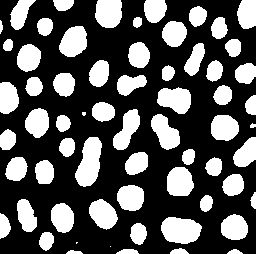

In [3]:
input_full = ij.scifio().datasetIO().open("http://imagej.net/images/blobs.gif")

//input_full has 3 channels. We only need one.
input = ij.op().run("hyperSliceView", input_full, 2, 0)

//invert the image so that the blobs are "on" and the background "off"
inverted = ij.op().run("create.img", input)
ij.op().run("invert", inverted, input)

binaryInput = ij.op().run("threshold.huang", inverted)

ij.notebook().display(binaryInput)

Now that we have our image, let's outline all of the blobs:

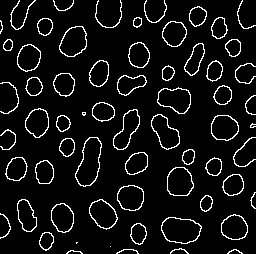

In [4]:
import net.imglib2.algorithm.neighborhood.HyperSphereShape

output = ij.op().run("outline", binaryInput, true)

ij.notebook().display(output)

To show the difference, let's [stack](../transform/stackView.ipynb) the images to see the difference:

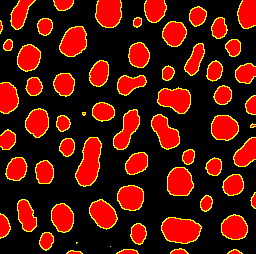

In [5]:
import net.imglib2.img.Img

list = new ArrayList<Img>()
 
list.add(binaryInput)
list.add(output)

stacked = ij.op().run("stackView", list)

ij.notebook().display(stacked)

Note the yellow edges that `outline` found (note that they are shared between the input and output, hence yellow) and the red insides of the blobs that were removed by `outline`.